# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 6


### Zadanie 1

Zaimplementuj symulację paradoksu Monty'ego Halla. Np. po 10 000 rozgrywek dla obu przypadków (kiedy gracz zostaje przy wybranej bramke oraz kiedy gracz zmienia wybór).
Czy wnik symulacji jest zgodny z teorią? 

Z [Wikipedii](https://pl.wikipedia.org/wiki/Paradoks_Monty%E2%80%99ego_Halla):

> Zawodnik stoi przed trzema zasłoniętymi bramkami. Za jedną z nich (za którą – wie to tylko prowadzący program) jest nagroda (umieszczana całkowicie losowo). Gracz wybiera jedną z bramek. Prowadzący program odsłania inną bramkę (co istotne – anonsując, że jest to bramka pusta), po czym proponuje graczowi zmianę wyboru. <br /><br />
Intuicyjnie nie ma znaczenia, czy zawodnik pozostanie przy swoim wyborze, czy nie. Okazuje się jednak, że jest inaczej. Przy wyborze strategii pozostawania przy swoim pierwszym wyborze prawdopodobieństwo wygranej wynosi 1/3. Natomiast przy wyborze „strategii zmiany” wynosi 2/3. <br /><br />
Oznacza to, że zawodnikowi opłaci się zmienić bramkę, ponieważ ma wtedy dwa razy większe szanse na wygraną. Paradoks wynika z niedocenienia informacji, jaką „między wierszami” przekazuje prowadzący. Informacją tą jest wskazanie pustej bramki. <br /><br />
Innymi słowy poprzez otwarcie jednej z pustych bramek prowadzący zmniejsza liczność zbioru „pustych bramek”, a w rezultacie prawdopodobieństwo przegranej z 2/3 do 1/3. „Pozostałe” prawdopodobieństwo wygranej musi wynosić więc obecnie 2/3.
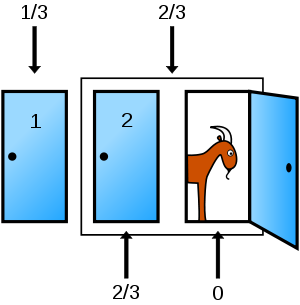




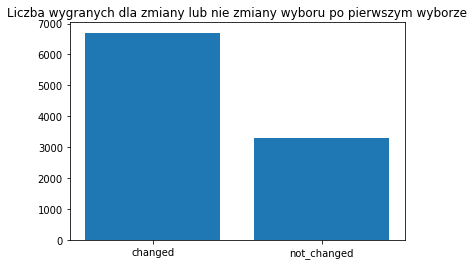

In [109]:
from typing import Dict
from numpy import zeros
from random import randint
from matplotlib.pyplot import bar, show, xticks, title


def game(change_choice: bool) -> bool:
    price = zeros(3).astype(int)
    price[randint(0, price.shape[0] - 1)] = 1

    pick = price[randint(0, price.shape[0] - 1)]

    if (change_choice and pick == 0) or (not change_choice and pick == 1):
        return True

    return False


def simulate_game(change_choice: bool, max_iter: int = 10_000) -> Dict:
    results = {
        'win': 0
    }

    for _ in range(max_iter):
        game_result = game(change_choice)

        if game_result:
            results.update({'win': results.get('win') + 1})

    return results.get('win')


results = {
    'changed': simulate_game(change_choice=True, max_iter=10_000),
    'not_changed': simulate_game(change_choice=False, max_iter=10_000)
}

title('Liczba wygranych dla zmiany lub nie zmiany wyboru po pierwszym wyborze')
bar([0, 1], [results.get('changed'), results.get('not_changed')])
xticks([0, 1], results.keys())
show()

### Zadanie 2

#### A)
Wczytaj z klawiatury $m$ liter (mogą się powtarzać), a następnie wypisz wszystkie permutacje tych $m$ liter, podkreślając te, które tworzą poprawne polskie słowa (na podstawie słownika ściągniętego i wypakowanego z https://sjp.pl/sl/growy/).

Warunki:
- W jednej linii należy wypisać 5 permutacji, po czym przejść do nowego wiersza.
- Jeśli wprowadzony napis zawiera znaki spoza `[a-z]` (tylko litery łacińskie), to należy wypisać stosowny komunikat.
- Wprowadzone litery mogą się powtarzać, ale permutacji wtedy nie powtarzamy. 
Przykładowo, dla wprowadzonego ciągu `aaab` program ma wypisać tylko 4 permutacje (w dowolnej kolejności): `aaab`, `aaba`, `abaa`, `baaa`.

Przykład:

```
Podaj 4 litery z [a-z]: aatm
aatm    aamt    atam    atma    amat

amta    taam    tama    tmaa    maat
                ----
mata    mtaa
----
```

#### B)
Napisz wzór, który umożliwi wyświetlenie liczby tak opisanych permutacji bez konieczności ich generowania.



# A

In [159]:
dic_words = []

with open('slowa.txt', encoding='utf-8') as f:
    dic_words = [line[:len(line) - 1] for line in f.readlines()]

In [160]:
from typing import Set
from itertools import permutations


def get_letter_permutations(text: str) -> Set:
    return set([''.join(perm) for perm in tuple(permutations(text))])


def get_perms_with_marked_words(letters: str) -> str:
    permuts = get_letter_permutations(letters)

    all_lines, word_line, sep_line = '', '', ''
    for i, word in enumerate(permuts):
        if word in dic_words:
            sep_line += '-'.join(['' for _ in range(len(word) + 1)])
        else:
            sep_line += ' '.join(['' for _ in range(len(word) + 1)])

        word_line, sep_line = f'{word_line}{word}   ', f'{sep_line}   '

        if (i + 1) % 5 == 0 or len(permuts) == i + 1:
            all_lines = f'{all_lines}\n{word_line}\n{sep_line}'
            word_line, sep_line = '', ''

    return all_lines

In [161]:
m = int(input('Podaj ile liter chcesz wpisac:'))
letters = input('Podaj litery:')

if len(letters) != m:
    raise ValueError('Podales zla liczbe liter')

print(get_perms_with_marked_words(letters))


aamt   taam   tmaa   maat   mtaa   
                                   
amat   tama   atam   aatm   amta   
       ----                        
mata   atma   
----          


# B

$$
  P_{k_{1}k_{2}k_{3}...k_{m}}(n) = \frac{n!}{k_{1}!k_{2}!k_{3}!...k_{m}!}
$$